In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import pearsonr, spearmanr

In [ ]:
# Load the datasets
test_data = pd.read_csv('TEST_FINAL.csv')
train_data = pd.read_csv('TRAIN.csv')

# Display the first few rows of each dataset to understand their structure
test_data_head = test_data.head()
train_data_head = train_data.head()

test_data_info = test_data.info()
train_data_info = train_data.info()

test_data_head, train_data_head, test_data_info, train_data_info


FileNotFoundError: [Errno 2] No such file or directory: 'TEST_FINAL.csv'

1.	Univariate Analysis: Study the distribution of each variable, such as daily sales and the number of orders, using histograms or box plots to understand their central tendencies and dispersions.


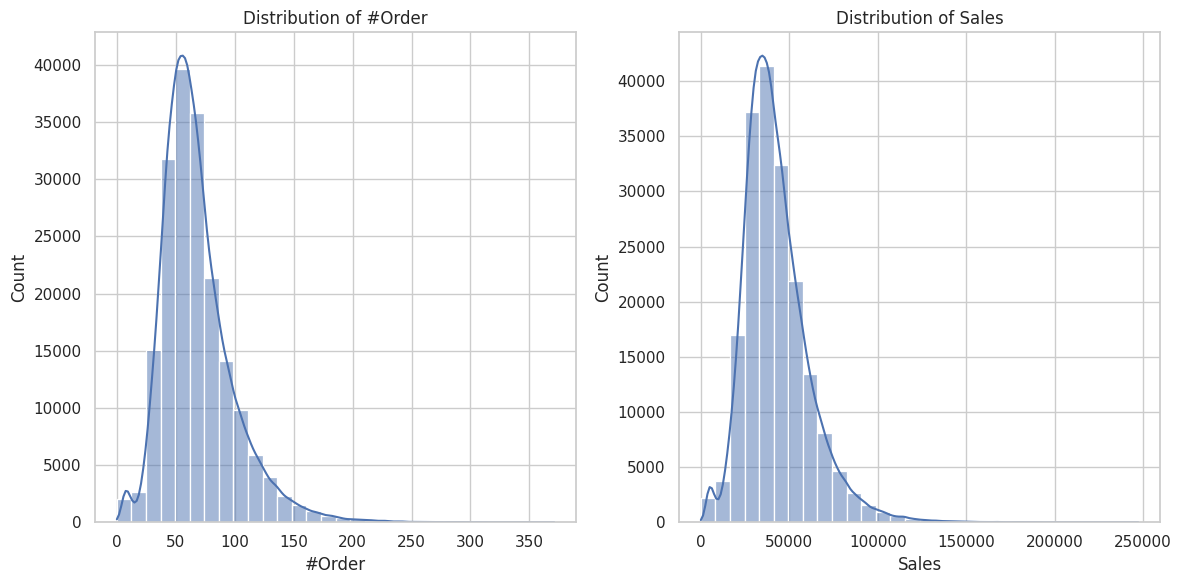

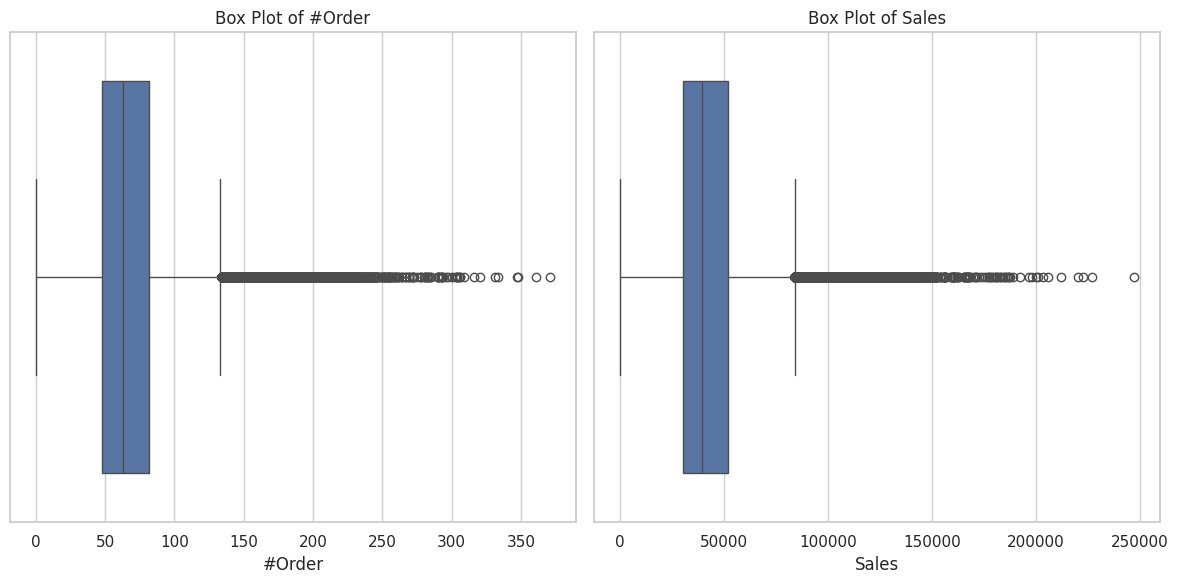

In [ ]:


# Set up the visualisation style
sns.set(style="whitegrid")

# Univariate Analysis: Distribution of #Order
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_data['#Order'], bins=30, kde=True)
plt.title('Distribution of #Order')

# Univariate Analysis: Distribution of Sales
plt.subplot(1, 2, 2)
sns.histplot(train_data['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')

plt.tight_layout()
plt.show()

# Box plots for #Order and Sales
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=train_data['#Order'])
plt.title('Box Plot of #Order')

plt.subplot(1, 2, 2)
sns.boxplot(x=train_data['Sales'])
plt.title('Box Plot of Sales')

plt.tight_layout()
plt.show()


2.	Bivariate Analysis: Examine relationships between sales and potentially influential factors like discounts, holidays, and store types using scatter plots and correlation matrices.

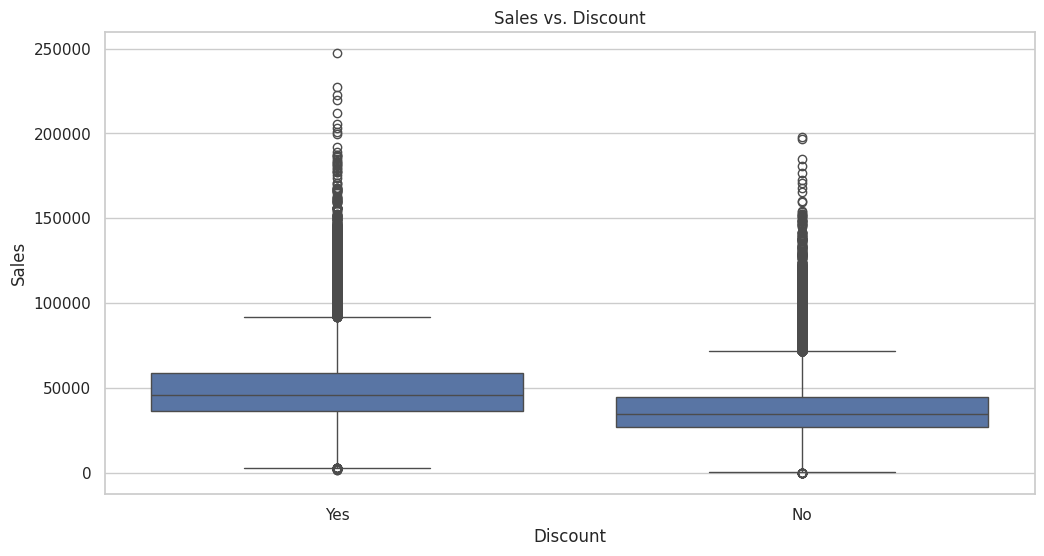

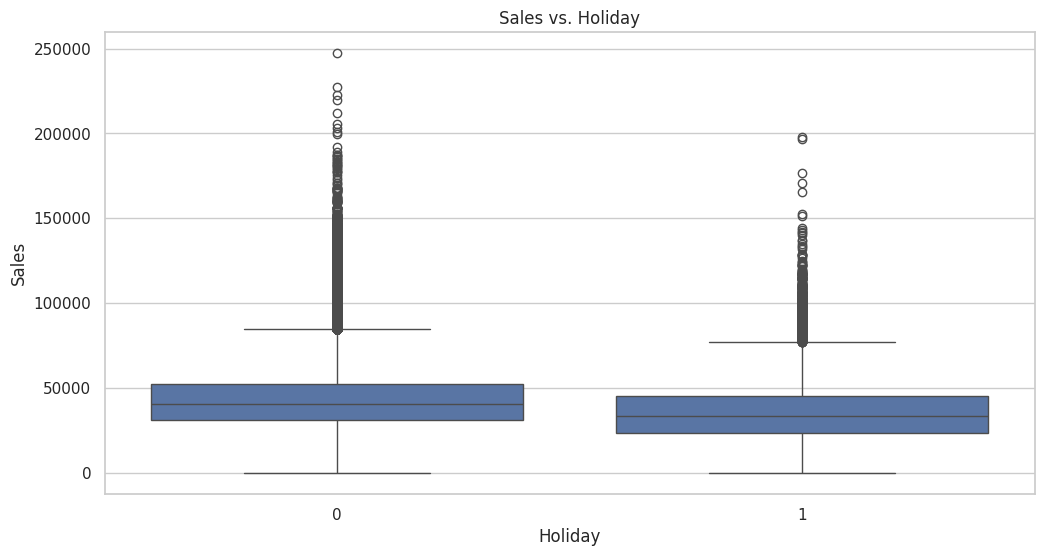

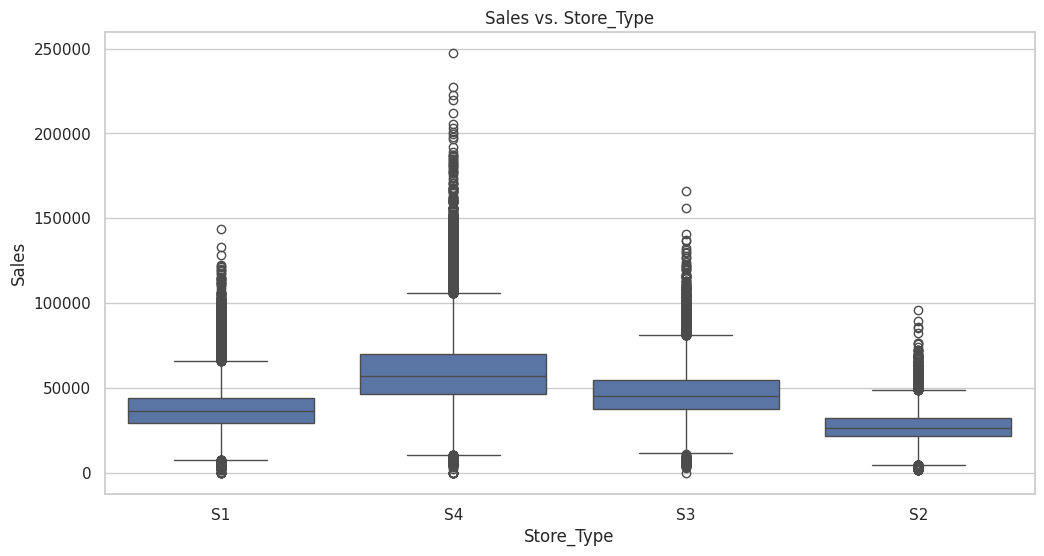

,#Order,Sales
#Order,1.000000,0.941601
Sales,0.941601,1.000000


In [ ]:
# Convert Date to datetime for time series analysis
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Bivariate Analysis: Sales vs. Discount
plt.figure(figsize=(12, 6))
sns.boxplot(x='Discount', y='Sales', data=train_data)
plt.title('Sales vs. Discount')
plt.show()

# Bivariate Analysis: Sales vs. Holiday
plt.figure(figsize=(12, 6))
sns.boxplot(x='Holiday', y='Sales', data=train_data)
plt.title('Sales vs. Holiday')
plt.show()

# Bivariate Analysis: Sales vs. Store_Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Store_Type', y='Sales', data=train_data)
plt.title('Sales vs. Store_Type')
plt.show()

# Correlation matrix
correlation_matrix = train_data[['#Order', 'Sales']].corr()

correlation_matrix


3.	Time Series Analysis: Analyze sales trends over time to identify seasonality, trends, and cyclic behavior.

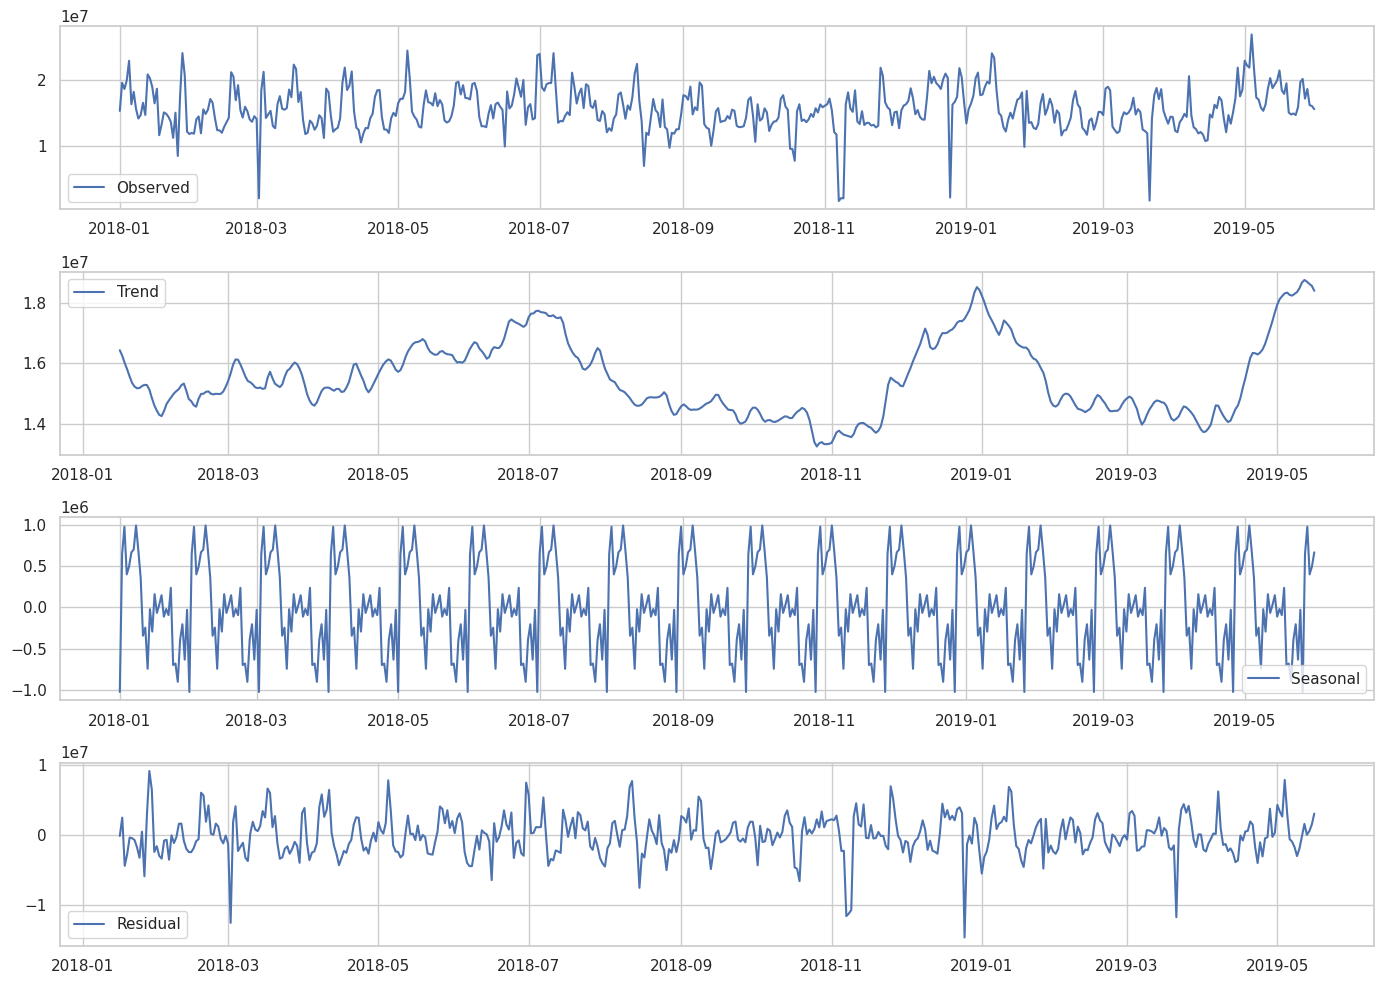

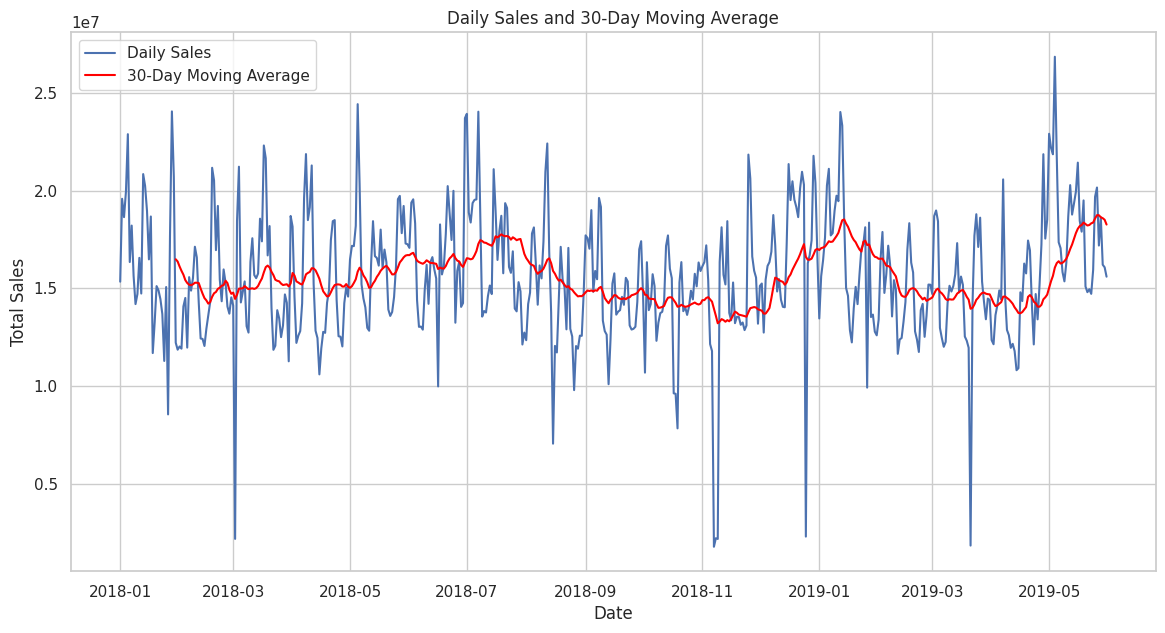

In [ ]:
# Reattempt the seasonal decomposition with a shorter period, e.g., 30 days for monthly seasonality
decomposition = seasonal_decompose(daily_sales, model='additive', period=30)

# Plot the decomposed components
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Calculate and plot moving averages
daily_sales_rolling_mean = daily_sales.rolling(window=30).mean()  # 30-day moving average

plt.figure(figsize=(14, 7))
plt.plot(daily_sales, label='Daily Sales')
plt.plot(daily_sales_rolling_mean, label='30-Day Moving Average', color='red')
plt.title('Daily Sales and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(loc='best')
plt.show()


4.	Categorical Data Analysis: Use bar charts and frequency tables to explore the distribution of sales across different store types, locations, and regions.

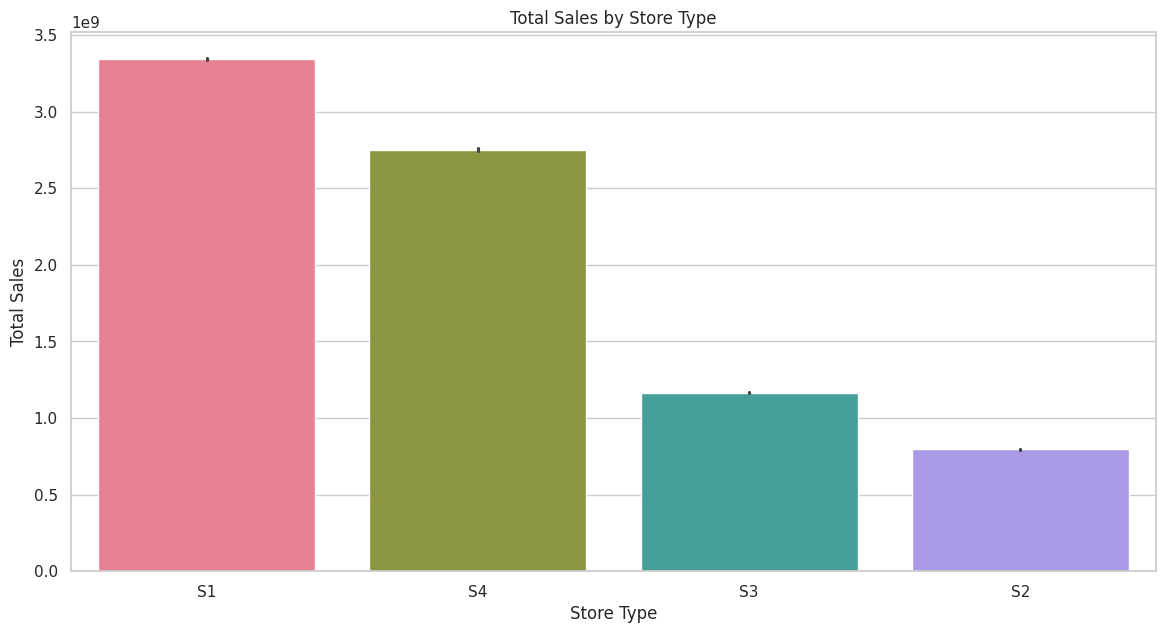

In [ ]:
# Ensure unique colors for each Store_Type
unique_store_types = train_data['Store_Type'].unique()
palette = sns.color_palette("husl", len(unique_store_types))

# Plot the bar chart
plt.figure(figsize=(14, 7))
sns.barplot(x='Store_Type', y='Sales', data=train_data, estimator=sum, palette=palette, hue='Store_Type', dodge=False)
plt.title('Total Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Total Sales')
plt.legend().remove()
plt.show()

<ipython-input-29-be4b99cae7f1>:7: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x='Location_Type', y='Sales', data=train_data, estimator=sum,palette=palette, hue='Store_Type', dodge=False)


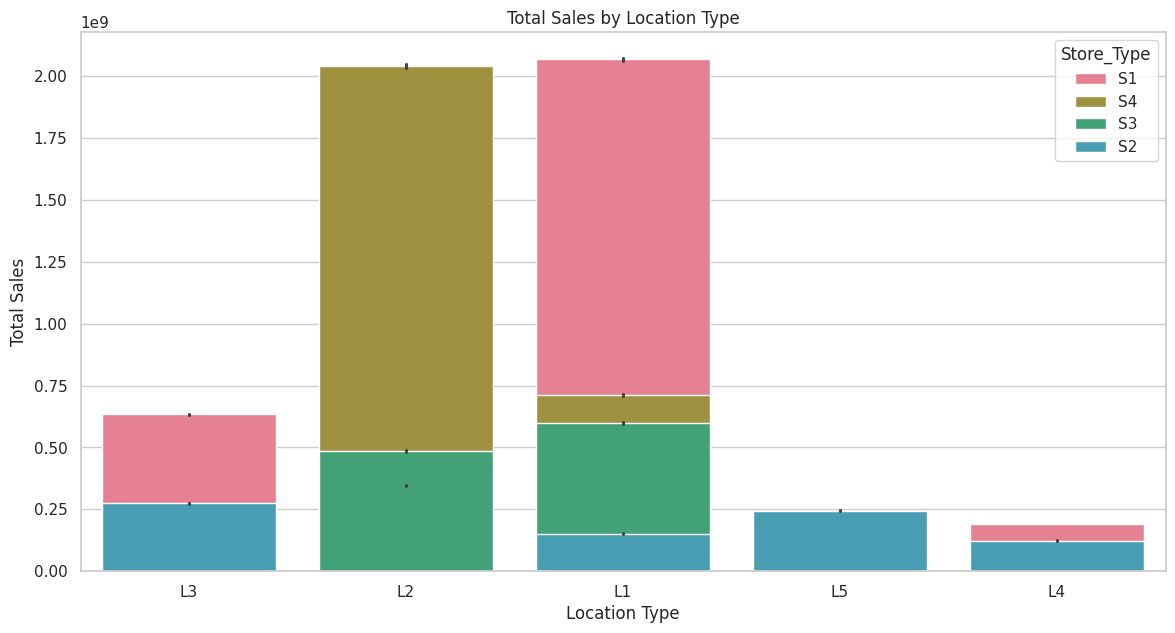

In [ ]:

# Ensure unique colors for each Store_Type
unique_Location_Type = train_data['Location_Type'].unique()
palette = sns.color_palette("husl", len(unique_Location_Type))

# Bar chart for Location_Type
plt.figure(figsize=(14, 7))
sns.barplot(x='Location_Type', y='Sales', data=train_data, estimator=sum,palette=palette, hue='Store_Type', dodge=False)
plt.title('Total Sales by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Total Sales')
plt.show()


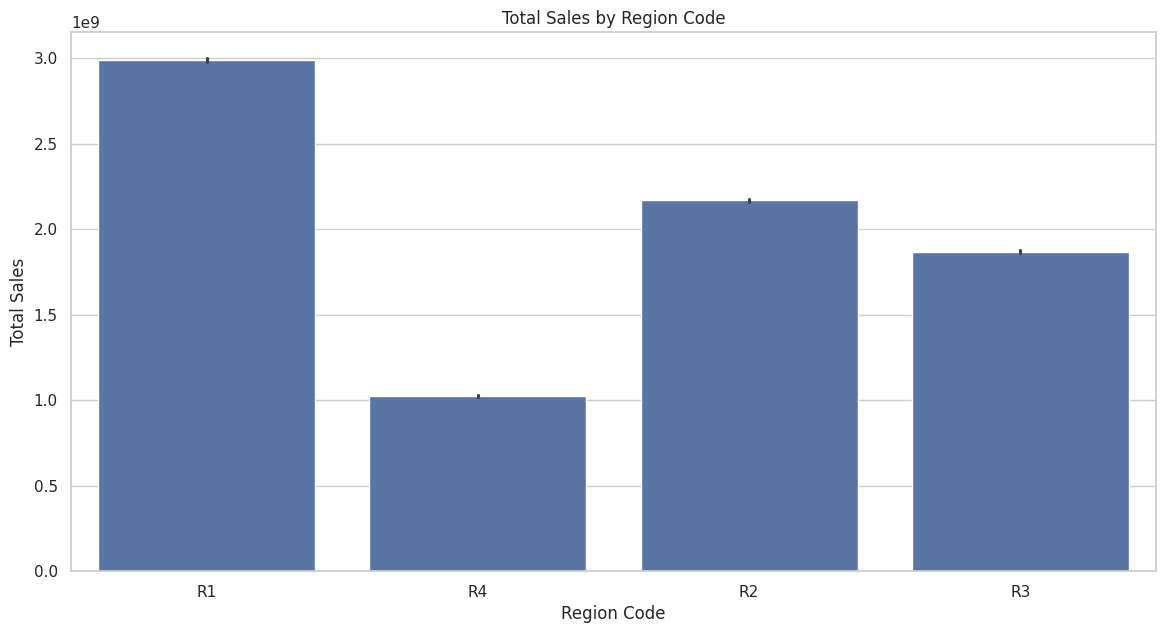

In [ ]:
# Bar chart for Region_Code
plt.figure(figsize=(14, 7))
sns.barplot(x='Region_Code', y='Sales', data=train_data, estimator=sum)
plt.title('Total Sales by Region Code')
plt.xlabel('Region Code')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
# Frequency table for Store_Type
store_type_freq = train_data['Store_Type'].value_counts()
print("Frequency Table for Store_Type:\n", store_type_freq)

# Frequency table for Location_Type
location_type_freq = train_data['Location_Type'].value_counts()
print("\nFrequency Table for Location_Type:\n", location_type_freq)

# Frequency table for Region_Code
region_code_freq = train_data['Region_Code'].value_counts()
print("\nFrequency Table for Region_Code:\n", region_code_freq)


Frequency Table for Store_Type:
 Store_Type
S1    88752
S4    45924
S2    28896
S3    24768
Name: count, dtype: int64

Frequency Table for Location_Type:
 Location_Type
L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: count, dtype: int64

Frequency Table for Region_Code:
 Region_Code
R1    63984
R2    54180
R3    44376
R4    25800
Name: count, dtype: int64


Suggestions for Hypothesis Testing


1. Impact of Discounts on Sales
Hypothesis: Stores offering discounts will have significantly higher sales than stores not offering discounts.

Test: Perform a t-test for the mean sales on days with discounts versus days without.

In [ ]:
# Ensure the dataset has columns for 'Discount_Indicator' and 'Sales'
discounted_sales = train_data[train_data['Discount'] == 1]['Sales']
non_discounted_sales = train_data[train_data['Discount'] == 0]['Sales']

# Perform a t-test
t_stat, p_value = ttest_ind(discounted_sales, non_discounted_sales)
print(f'T-test result: t-statistic = {t_stat}, p-value = {p_value}')

T-test result: t-statistic = nan, p-value = nan


2. Effect of Holidays on Sales
Hypothesis: Sales on holidays are higher compared to non-holidays.

Test: Use a t-test or ANOVA to compare sales on holidays vs. regular days.

In [ ]:
# Ensure the dataset has columns for 'Holiday_Indicator' and 'Sales'
holiday_sales = train_data[train_data['Holiday'] == 1]['Sales']
non_holiday_sales = train_data[train_data['Holiday'] == 0]['Sales']

# Perform a t-test
t_stat, p_value = ttest_ind(holiday_sales, non_holiday_sales)
print(f'T-test result: t-statistic = {t_stat}, p-value = {p_value}')


T-test result: t-statistic = -67.99011744850168, p-value = 0.0


3. Sales Differences Across Store Types
Hypothesis: Different store types experience different sales volumes.

Test: Conduct ANOVA to compare the mean sales across different store types.

In [ ]:
# Ensure the dataset has columns for 'Store_Type' and 'Sales'
store_types = train_data['Store_Type'].unique()
sales_data_by_store_type = [train_data[train_data['Store_Type'] == store_type]['Sales'] for store_type in store_types]

# Perform ANOVA
f_stat, p_value = f_oneway(*sales_data_by_store_type)
print(f'ANOVA result: F-statistic = {f_stat}, p-value = {p_value}')

ANOVA result: F-statistic = 35123.64411601773, p-value = 0.0


4. Regional Sales Variability
Hypothesis: There is significant variability in sales across different regions.

Test: Kruskal-Wallis test if the data is not normally distributed or ANOVA if it is, to compare sales across regions.

In [ ]:
# Ensure the dataset has columns for 'Region_Code' and 'Sales'
regions = train_data['Region_Code'].unique()
sales_data_by_region = [train_data[train_data['Region_Code'] == region]['Sales'] for region in regions]

# Perform Kruskal-Wallis test
k_stat, p_value = kruskal(*sales_data_by_region)
print(f'Kruskal-Wallis test result: K-statistic = {k_stat}, p-value = {p_value}')

Kruskal-Wallis test result: K-statistic = 3968.063590460667, p-value = 0.0


5. Correlation between Number of Orders and Sales
Hypothesis: A higher number of orders correlates with higher sales.

Test: Calculate Pearson or Spearman correlation coefficient, depending on the data distribution.

In [ ]:
# Ensure the dataset has columns for 'Number_of_Orders' and 'Sales'
orders = train_data['#Order']
sales = train_data['Sales']

# Perform Pearson correlation
pearson_corr, p_value_pearson = pearsonr(orders, sales)
print(f'Pearson correlation: correlation = {pearson_corr}, p-value = {p_value_pearson}')

# Perform Spearman correlation
spearman_corr, p_value_spearman = spearmanr(orders, sales)
print(f'Spearman correlation: correlation = {spearman_corr}, p-value = {p_value_spearman}')


Pearson correlation: correlation = 0.9416005646125761, p-value = 0.0
Spearman correlation: correlation = 0.9377462542885381, p-value = 0.0
